# Linear regression

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('five_minute.csv',parse_dates = ['time'],index_col= 'time')

In [9]:
df

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [11]:
df.isnull().sum()

price    0
dtype: int64

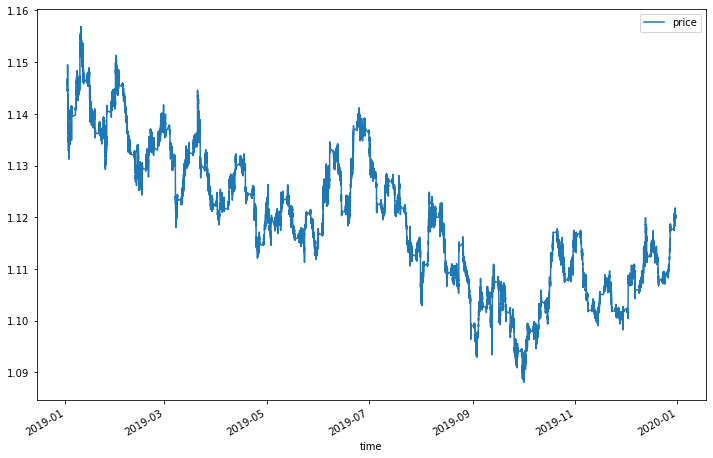

In [12]:
df.plot(figsize=(12,8))
plt.show()

In [18]:
df['returns']= np.log(df.div(df.shift(1)))


In [20]:
df

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076


In [21]:
df['lag1']= df['returns'].shift(1)

In [22]:
df

,price,returns,lag1
time,,,
2019-01-01 22:00:00+00:00,1.146580,NaN,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201,NaN
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027


In [23]:
df.dropna(inplace = True)

In [24]:
df

,price,returns,lag1
time,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027


In [25]:
from sklearn.linear_model import LinearRegression


In [31]:
lm = LinearRegression(fit_intercept = True)
lm.fit(df.lag1.to_frame(),df['returns'])


LinearRegression()

In [32]:
df['predict'] = lm.predict(df.lag1.to_frame())

In [33]:
df

,price,returns,lag1,predict
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,6.397912e-06
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,5.525013e-07
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-3.244247e-07
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-6.462425e-06
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.283038e-06
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,3.414522e-06
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.748582e-07
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.221814e-06


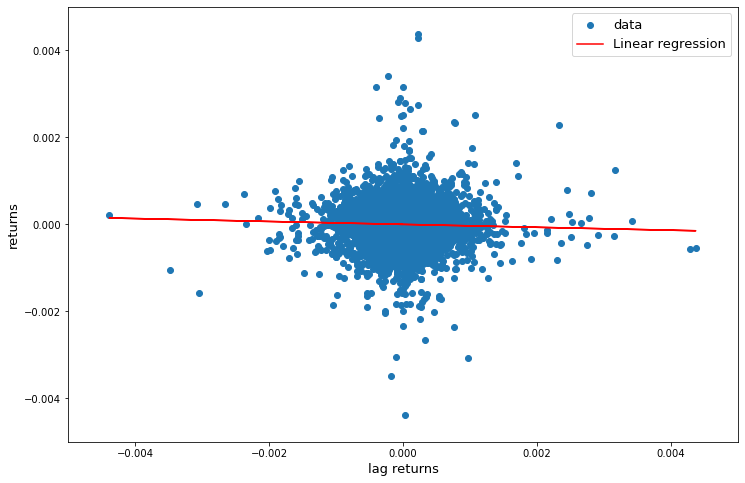

In [34]:
plt.figure(figsize = (12,8))
plt.scatter(x = df.lag1,y = df.returns,label = 'data')
plt.plot(df.lag1,df.predict,c = 'red',label = 'Linear regression')
plt.xlim(-0.005,0.005)
plt.ylim(-0.005,0.005)
plt.legend(fontsize = 13)
plt.xlabel('lag returns',fontsize = 13)
plt.ylabel('returns',fontsize = 13)
plt.show()

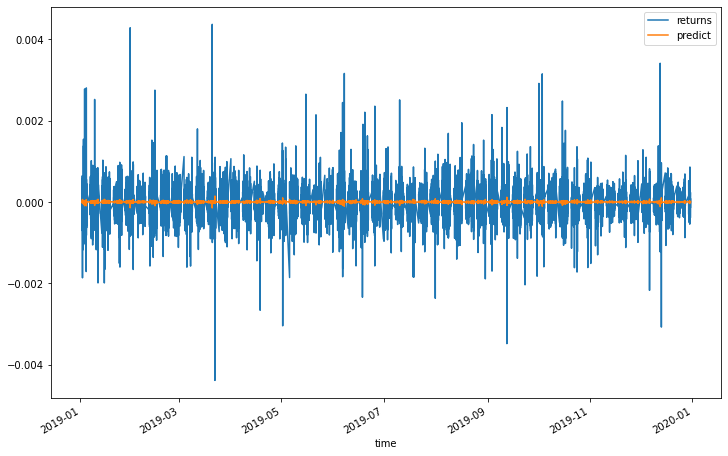

In [36]:
df[['returns','predict']].plot(figsize = (12,8))
plt.show()

In [38]:
df['predict'] = np.sign(df['predict'])

In [39]:
df

,price,returns,lag1,predict
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,1.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-1.0
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.0
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.0


In [40]:
np.sign(df['returns']*df['predict'])

time
2019-01-01 22:10:00+00:00   -1.0
2019-01-01 22:15:00+00:00    0.0
2019-01-01 22:20:00+00:00   -1.0
2019-01-01 22:25:00+00:00    1.0
2019-01-01 22:30:00+00:00   -1.0
                            ... 
2019-12-30 23:35:00+00:00   -1.0
2019-12-30 23:40:00+00:00   -1.0
2019-12-30 23:45:00+00:00   -1.0
2019-12-30 23:50:00+00:00    1.0
2019-12-30 23:55:00+00:00   -1.0
Length: 73718, dtype: float64

In [42]:
hits = np.sign(df['returns']*df['predict']).value_counts()

In [43]:
hits

 1.0    37451
-1.0    34308
 0.0     1959
dtype: int64

In [44]:
hit_ratio = hits[1.0]/sum(hits)

In [45]:
hit_ratio

0.5080306031091457

# Multiple Regression

In [46]:
df1 = pd.read_csv('five_minute.csv',parse_dates = ['time'],index_col= 'time')

In [47]:
df1

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [49]:
df1.dropna(inplace = True)

In [50]:
df1['returns']= np.log(df1.div(df1.shift(1)))


In [80]:
lags = 5
cols = []
for lag in range(1,lags + 1):
    col = 'lag{}'.format(lag)
    df1[col] = df1['returns'].shift(lag)
    cols.append(col)
df1.dropna(inplace = True)    


In [81]:
df1

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [82]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [83]:
lm = LinearRegression(fit_intercept = True)

In [84]:
lm.fit(df1[cols],df1['returns'])

LinearRegression()

In [85]:
df1['pred'] = lm.predict(df1[cols].values)

C:\Users\shyam suthar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [86]:
df1

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.656886e-06
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.138024e-06
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.132699e-06
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.614338e-06
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.700632e-06
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,3.239091e-06
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-3.761738e-08
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.638845e-06


In [87]:
df1['pred'] = np.sign(df1['pred'])

In [88]:
df1

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0


In [90]:
df1.pred.value_counts()

-1.0    39610
 1.0    34104
Name: pred, dtype: int64

In [92]:
hits = np.sign(df1['returns']*df1['pred']).value_counts()

In [93]:
hits

 1.0    37493
-1.0    34263
 0.0     1958
dtype: int64

In [94]:
hit_ratio = hits[1.0]/sum(hits)

In [95]:
hit_ratio

0.5086279404183737

In [96]:
df1['strategy'] = df1['pred'] * df1['returns']

In [97]:
df1

,price,returns,lag1,lag2,lag3,lag4,lag5,pred,strategy
time,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0,-0.000017
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0,0.000000
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0,0.000074
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0,-0.000048
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0,0.000140
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0,-0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0,-0.000076


In [98]:
df1['creturns'] = df1['returns'].cumsum().apply(np.exp)
df1['cstrategy'] = df1['strategy'].cumsum().apply(np.exp)

In [99]:
df1

,price,returns,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy
time,,,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0,-0.000017,0.999983,0.999983
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0,0.000000,0.999983,0.999983
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0,0.000074,0.999908,1.000057
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0,-0.000048,0.999860,1.000009
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0,0.000140,1.000000,1.000148
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0,-0.000004,0.977064,1.519495
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0,-0.000027,0.977091,1.519454
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0,-0.000076,0.977165,1.519339


## Backtesting

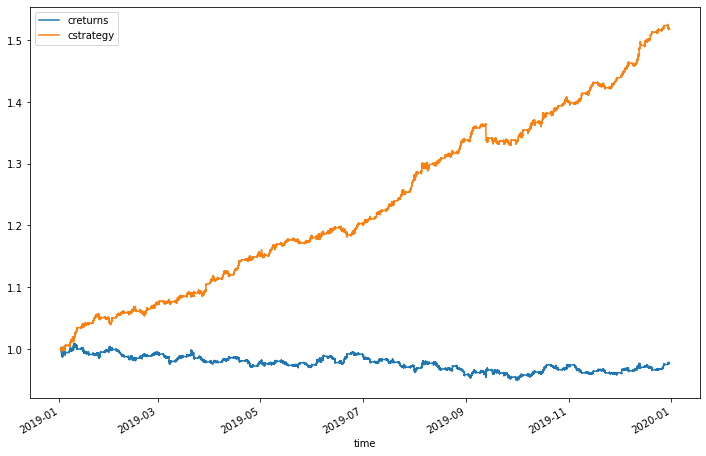

In [101]:
df1[['creturns','cstrategy']].plot(figsize = (12,8))
plt.show()